In [2]:
from sklearn.datasets import load_iris

In [44]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


X,Y = make_regression(n_samples = 100, n_features = 5, n_informative=3,random_state = 1, shuffle = True)

In [45]:
import seaborn as sns
import pandas as pd
data = pd.DataFrame(X)

In [46]:
data["target"] = Y

In [47]:
from matplotlib import pyplot as plt

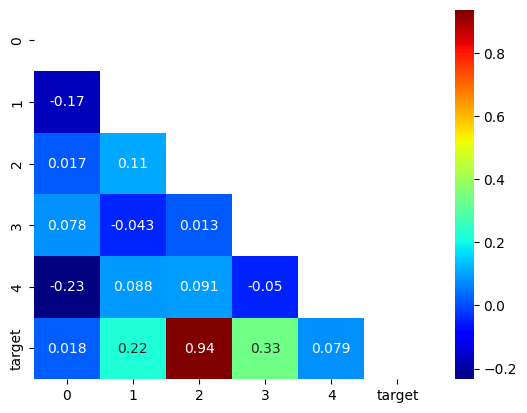

In [48]:
import numpy as np
mask = np.full_like(data.corr(),dtype = bool, fill_value  = False)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), mask = mask, annot = True, cmap = "jet")
plt.show()

In [56]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler",StandardScaler()), ("regression", LinearRegression())])
trainX, testX, trainY, testY = train_test_split(X,Y, random_state = 2, test_size = 0.2, shuffle = True) 


In [57]:
pipe.fit(trainX,trainY)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [60]:
from sklearn.metrics import r2_score
y_hat = pipe.predict(testX)
r2_score(pipe.predict(testX),testY)

1.0

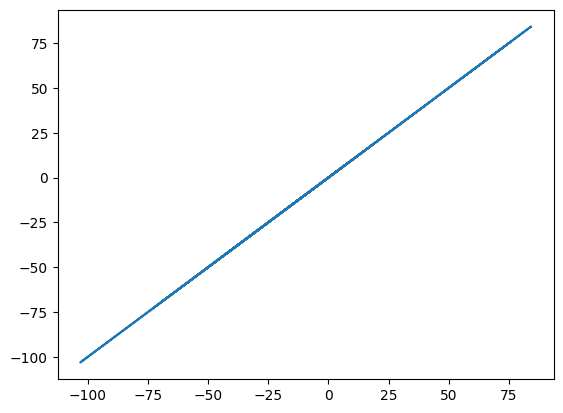

In [61]:
plt.plot(testY,y_hat)

In [64]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(), trainX,trainY, cv = 5)

array([1., 1., 1., 1., 1.])

In [85]:
pipe.named_steps["regression"]

LinearRegression()

In [68]:
regression_model = pipe.named_steps["regression"]

<BarContainer object of 5 artists>

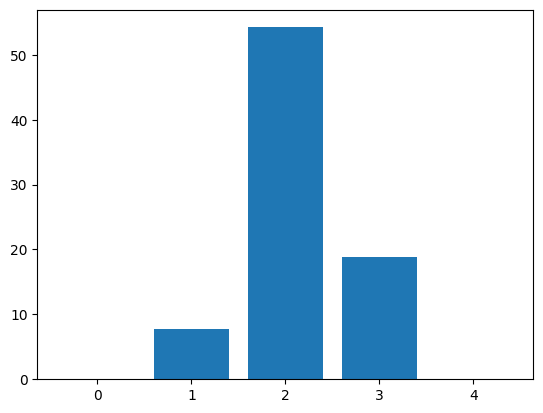

In [84]:
plt.bar(np.arange(5),height = np.ravel(regression_model.coef_))

In [83]:
regression_model.coef_.shape

(5,)

In [115]:
X,Y = make_regression(n_samples = 100, n_features = 1, noise =100,  tail_strength= 0.8)
trainX, testX, trainY, testY = train_test_split(X,Y, random_state = 1, test_size = 0.25)
from sklearn.preprocessing import PolynomialFeatures
fitted = {}
for deg in [1,2,3,4]:
    pipe = Pipeline([("scaler",StandardScaler()),
                    ("poly_features", PolynomialFeatures(degree = deg)),
                    ("regression",LinearRegression())])
    pipe.fit(trainX,trainY)
    fitted[deg] = pipe.predict(testX)







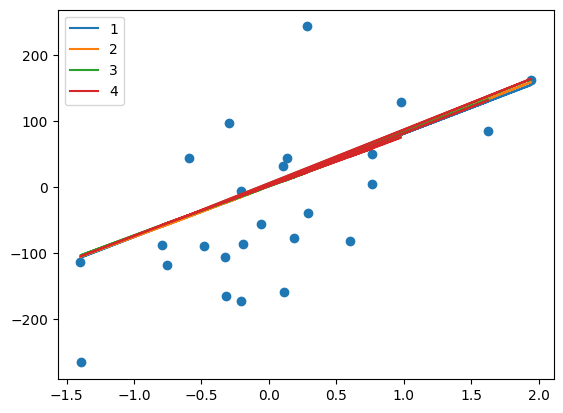

In [117]:
plt.scatter(testX,testY)

plt.plot(testX,fitted[1], label = 1)
plt.plot(testX,fitted[2], label = 2)
plt.plot(testX,fitted[3], label = 3)
plt.plot(testX,fitted[4], label = 4)
plt.legend()
    


In [103]:
feat = pipe.named_steps["poly_features"]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,